In [1]:
import pandas as pd
df=pd.read_csv('iris_label_encoded.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [2]:
x=df[['sepal width (cm)','petal length (cm)']]
x

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
145,3.0,5.2
146,2.5,5.0
147,3.0,5.2
148,3.4,5.4


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [29]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans =KMeans(n_clusters=k, init='k-means++',max_iter=300, n_init=10, random_state=40)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memor

import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

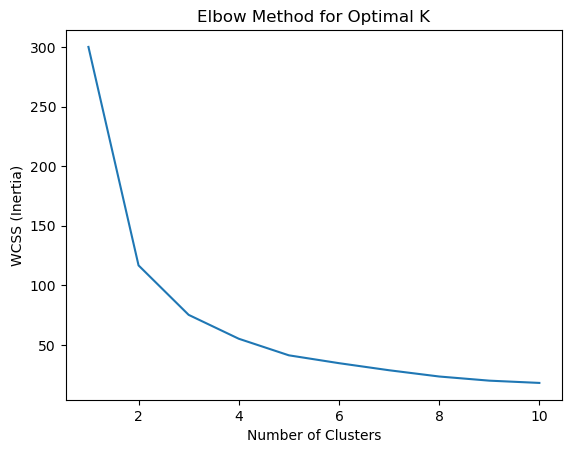

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [38]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10,random_state=40)
y_kmeans = kmeans.fit_predict(x_scaled)
print(f'Inertia for optimal k={optimal_k}:{kmeans.inertia_}')

Inertia for optimal k=5:41.191840627493356


C:\Users\Diyanjali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


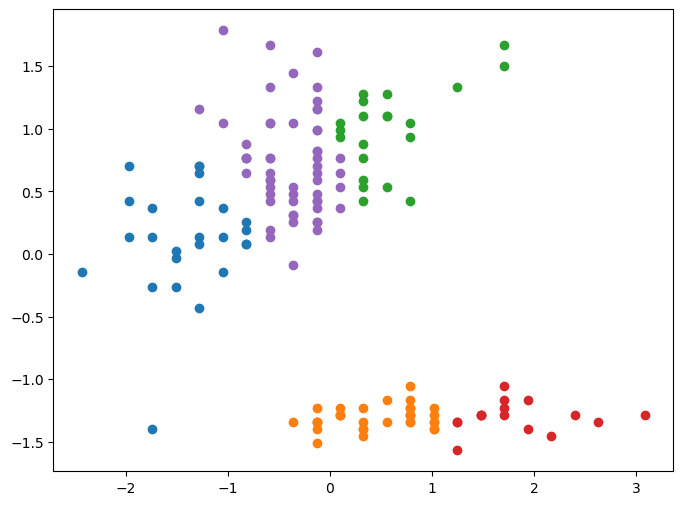

In [42]:
plt.figure(figsize=(8,6))
for i in range (optimal_k):
    plt.scatter(x_scaled[y_kmeans == i, 0], x_scaled[y_kmeans == i, 1], label=f'Cluster {i+1}')